# Project: Investigate a Dataset - [Tmdb movies dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>>In this project we will be analysing a data set associated with about 10,000 movies collected from The Movie Database (TMDb). In particular we will be interested in finding trends among user ratings and revenue.

>>Columns included: id (movie unique number), imdb_id (internet movie database unique number), popularity (popularity of the movie since it was released), budget (production cost of the movie), revenue (sales earned from releasing the movie), original_title (title of the movie), cast (actors), homepage (website of the company produced the movie), director (person who controlled the making of the movie), tagline (short text that clarifies the idea of the movie), keywords (key words that are stored on search engines so that when a person searches using any of these keywords, the movie appears), overview (brief summary of a movie), runtime (duration of a movie), genres (category of a movie story), production_companies (companies who were responsible for the making of a movie) , release_date (date a movie was released), vote_count (IMDb registered users can cast a vote (from 1 to 10) on movies), vote_average (average of votes), release_year (year a movie was released), budget_adj (budget adjusted for inflation or variations in movie ticket prices), revenue_adj (sales adjusted for inflation or variations in movie ticket prices)

## Research Questions
 Research Question 1 (Which movie earned highest revenue over the years?)
 Research Question 2 (Which movie earned highest vote count over the years?)
 Research Question 3 (In which month do most movies get released over the years?)
 Research Question 4 (Which movie needed highest budget from all movies over the years?)
 Research Question 5 (In which year were most movies released?)
 Research Question 6 (What is the average runtime of movies over the years?)
 Research Question 7 (Is the average vote correlated to runtime of movies?)
 Research Question 8 (Is popularity of movies correlated to their average vote?)
 Research Question 9 (Is budget of a movie correlated to its average vote?)
 Research Question 10 (Has revenue collected from movies rose or declined over the years?)

In [1]:
import pandas as pd
import numpy as np
import csv
% matplotlib inline
import seaborn as sns
from datetime import datetime as dt
from matplotlib import pyplot as plt


In [2]:
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

Read CSV file I chose and get first 8 rows in the dataframe

In [3]:
df= pd.read_csv('tmdb-movies.csv')
df.head(8)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08


Get number of rows and columns in the dataframe

In [4]:
df.shape

(10866, 21)

Compute a summary of statistics for the dataframe

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Obtain data types of each column

In [6]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Convert data type of the column 'release_date' from an object to datetime

In [7]:
df['release_date']= pd.to_datetime(df['release_date'])

Get a detailed summary of the dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

Drop columns that won't be using during the analysis

In [9]:
df.drop(['id','imdb_id','homepage','budget','director', 'cast', 'production_companies', 'revenue','tagline','overview','keywords'], axis=1, inplace=True)

Draw a histogram for the rest of the columns

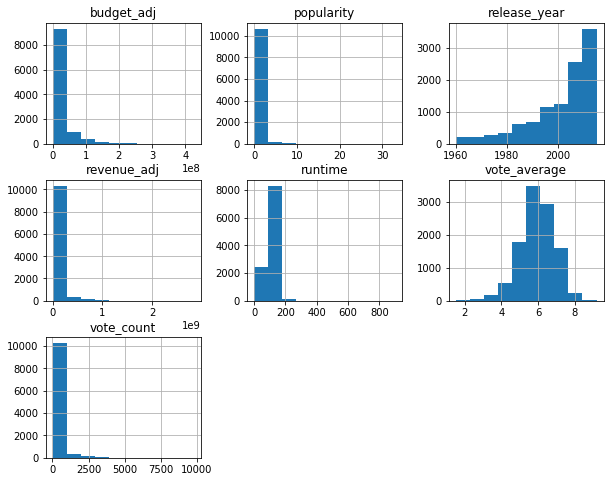

In [10]:
df.hist(figsize=(10, 8));

### Data Cleaning

Fill in the missing data in the column 'genres'

In [11]:
df['genres'].fillna('missing', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10866 non-null object
release_date      10866 non-null datetime64[ns]
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 849.0+ KB


Check how many duplicates in the dataframe

In [12]:
df.duplicated().sum()

1

Drop duplicates and then check for duplicates

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which movie earned highest revenue over the years?)

In [14]:
#sort revenue adjusted column to know the most movie of all time that earned highest revenue
df.sort_values(['revenue_adj'], ascending=False).head(1)

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,Avatar,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


Avatar movie earned the highest revenue over the years

### Research Question 2 (Which movie earned highest vote count over the years?)

In [15]:
#sort vote count column to know highest voted five movies of all times
df.sort_values(['vote_count'], ascending=False).head(5)

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,9.363643,Inception,148,Action|Thriller|Science Fiction|Mystery|Adventure,2010-07-14,9767,7.9,2010,1.600000e+08,8.255000e+08
4361,7.637767,The Avengers,143,Science Fiction|Action|Adventure,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09
1386,9.432768,Avatar,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
2875,8.466668,The Dark Knight,152,Drama|Action|Crime|Thriller,2008-07-16,8432,8.1,2008,1.873655e+08,1.014733e+09
4364,5.944518,Django Unchained,165,Drama|Western,2012-12-25,7375,7.7,2012,9.497443e+07,4.039911e+08


Inception movie had the highest vote count over the years

### Research Question 3 (In which month do most movies get released over the years?)

In [16]:
#count movies released in each month
df['release_date'].dt.month.value_counts().sort_index()

1      919
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
Name: release_date, dtype: int64

Most movies get released in September

#### Research Question 4 (Which movie needed highest budget from all movies over the years?)

In [17]:
#sort budget adjusted column to know which movie had highest budget spent on it during its making
df.sort_values(['budget_adj'], ascending=False).head(1)

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,0.25054,The Warrior's Way,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010,425000000.0,11087569.0


The Warrior's Way movie needed the highest budget through its making

### Research Question 5 (In which year were most movies released?)

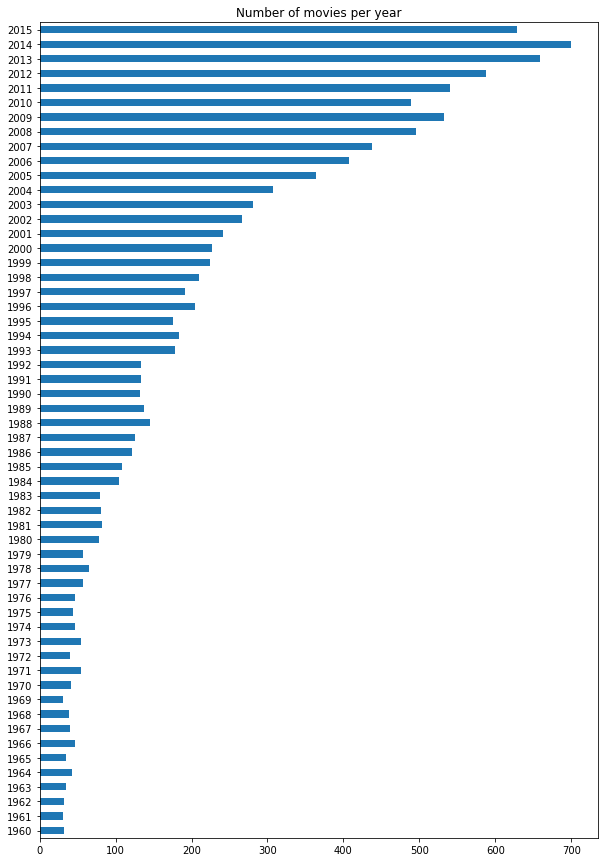

In [18]:
#count movies released per year and plot values in a horizontal bar chart
movie_count_per_year= df['release_year'].value_counts().sort_index()
movie_count_per_year.plot(kind="barh", title="Number of movies per year", figsize=(10, 15));

Most movies were released in 2014

### Research Question 6 (What is the average runtime of movies over the years?)

In [19]:
#get statistical summary of runtime column
df['runtime'].describe()

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

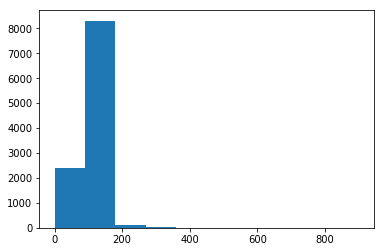

In [20]:
#plot histogram for the runtime column
plt.hist(df['runtime']);

Average runtime of movies is approximately 103 minutes

### Research Question 7 (Is the average vote correlated to runtime of movies?)

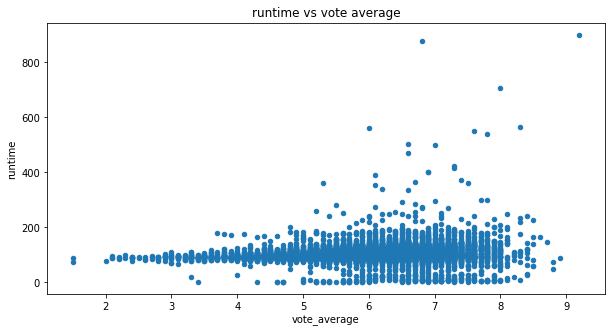

In [21]:
#create scatter plot for runtime and vote average columns
df.plot(x='vote_average',y='runtime',kind='scatter', title="runtime vs vote average", figsize=(10,5));

Average vote is positively correlated to runtime of movies (i.e., average vote of a movie does depend on duration of a movie)

### Research Question 8 (Is popularity of movies correlated to their average vote?)

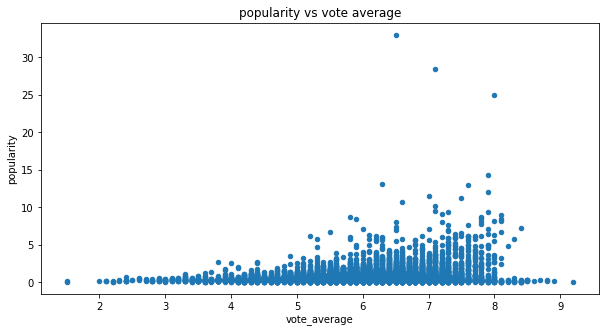

In [22]:
#create scatter plot for popularity and vote average columns 
df.plot(x='vote_average',y='popularity',kind='scatter', title="popularity vs vote average", figsize=(10,5));

Popularity of movies is positively correlated to average vote (i.e., popularity of a movie does depend on its average rating)

### Research Question 9 (Is budget of a movie correlated to its average vote?)

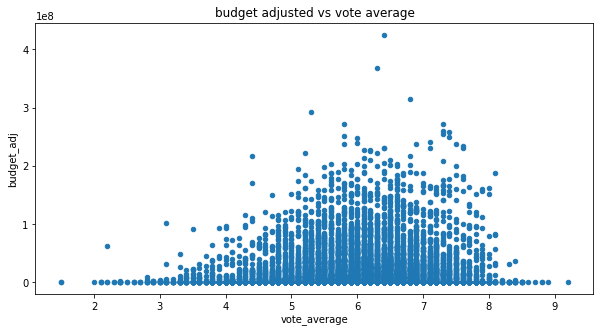

In [23]:
#create scatter plot for budget adjusted and vote average columns
df.plot(x='vote_average',y='budget_adj',kind='scatter', title="budget adjusted vs vote average", figsize=(10,5));

Budget of movies is positively correlated to their average vote (i.e., if budget spent on a movie during its making increases, its average rating increases, and vice versa)

### Research Question 10 (Has revenue collected from movies rose or declined over the years?)

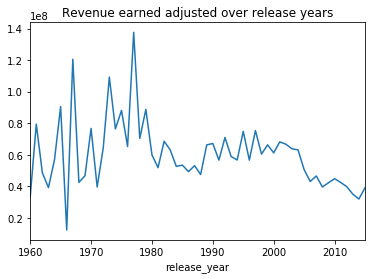

In [24]:
#create line graph for revenue adjusted all over the release years
df.groupby('release_year')['revenue_adj'].mean().plot(kind='line', title="Revenue earned adjusted over release years");

Revenue collected from movies is not consistent over the years, it has been rising and declining. It reached its peak in the late 1970’s, then it dropped and it has been almost consistent since then.

<a id='conclusions'></a>
## Conclusions
> 1- Avatar movie earned the highest revenue over the years
2- Inception movie had the highest vote count over the years
3- Most movies get released in September
4- The Warrior's Way movie needed the highest budget through its making
5- Most movies were released in 2014
6- Average runtime of movies is approximately 103 minutes
7- Average vote is positively correlated to runtime of movies (i.e., average vote of a movie does depend on duration of a movie)
8- Popularity of movies is positively correlated to average vote (i.e., popularity of a movie does depend on its average rating)
9- Budget of movies is positively correlated to their average vote (i.e., if budget spent on a movie during its making increases, its average rating increases, and vice versa)
10- Revenue collected from movies is not consistent over the years, it has been rising and declining. It reached its peak in the late 1970’s, then it dropped and it has been almost consistent since then.

### Limitations
> 1- Some of the data was missing, so results may not be so accurate

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0